<div align=center>

<p></p>
<p></p>
 <br/>
    <br/>
<font size=5 color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font size=5 color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Spring 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 5 - Kmeans
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  June the 23rd


<br/>
<br/>
<b>
<font size=5>
Kian Izadpanah - 400104783
</font>
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



# Librarires

In [2]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [3]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [19]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {}
        for i in range(self.n_clusters):
            self.centroids[i] = data[np.random.randint(0, len(data))]

        for i in range(self.max_iter):
            self.classes = {}
            for j in range(self.n_clusters):
                self.classes[j] = []

            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            prev_centroids = dict(self.centroids)

            for classification in self.classes:
                self.centroids[classification] = np.mean(self.classes[classification], axis=0)

            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > 0.0001:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Use elbow method and silhouette method to choose optimal cluster numbers

In [25]:
#TODO
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def elbow_method(data):
    sse = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        sse.append(sum([np.linalg.norm(features - kmeans.centroids[kmeans.predict(features)])**2 for features in data]))

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()


def silhouette_method(data):
    silhouette_avg = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        labels = [kmeans.predict(features) for features in data]
        silhouette_avg.append(silhouette_score(data, labels))
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_avg, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

### Elbow Method

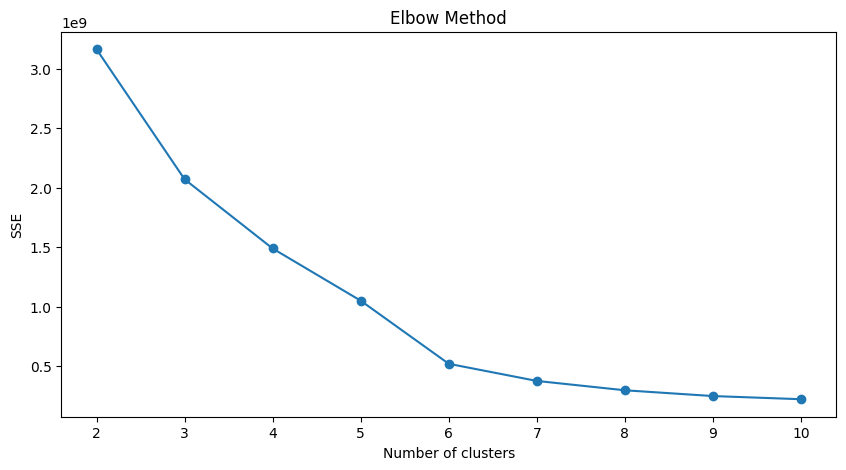

In [26]:
elbow_method(x_data)

### Silhouette_method

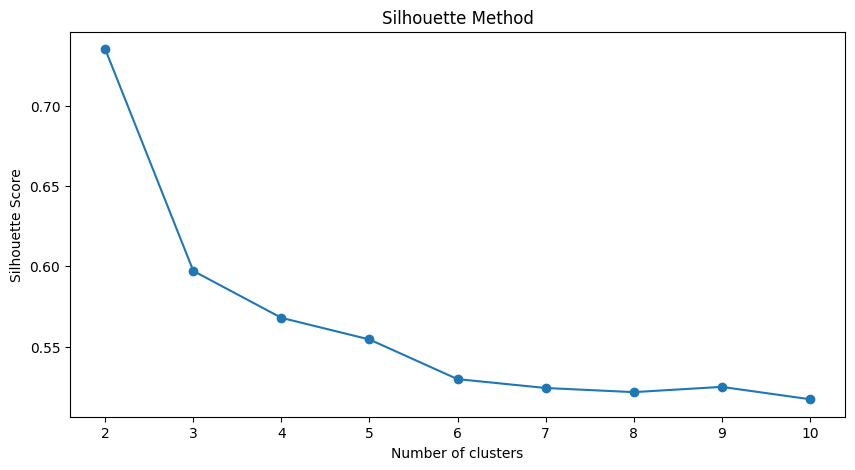

In [27]:
silhouette_method(x_data)

### Sklearn Elbow Method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

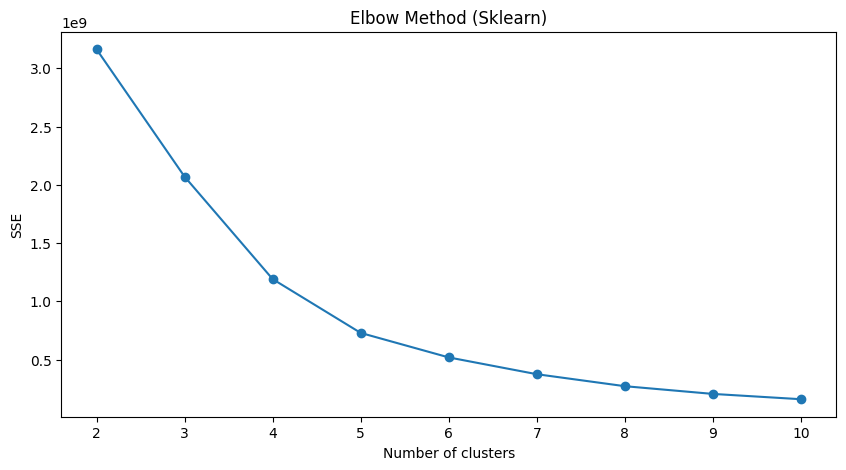

In [28]:
from sklearn.cluster import KMeans as SKkmeans

sse_sklearn = []
for k in range(2, 11):
    kmeans_sklearn = SKkmeans(n_clusters=k, random_state=101)
    kmeans_sklearn.fit(x_data)
    sse_sklearn.append(kmeans_sklearn.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse_sklearn, marker='o')
plt.title('Elbow Method (Sklearn)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Sklearn Silhouette Method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

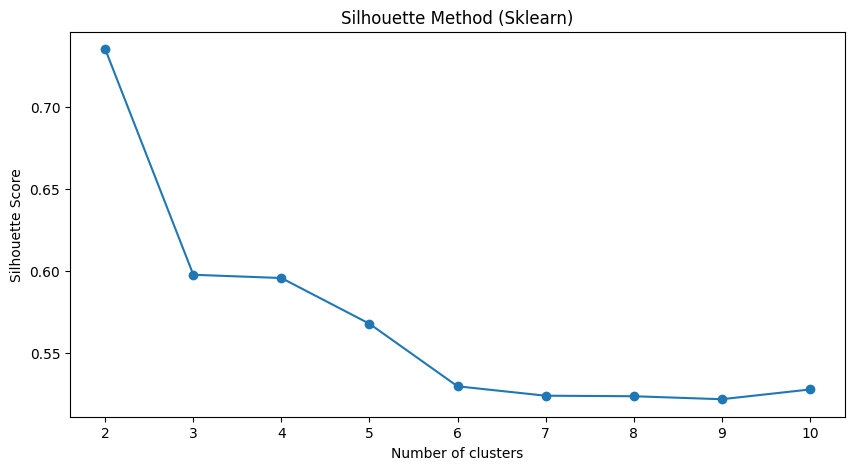

In [29]:
silhouette_sklearn = []
for k in range(2, 11):
    kmeans_sklearn = SKkmeans(n_clusters=k, random_state=101)
    kmeans_sklearn.fit(x_data)
    silhouette_sklearn.append(silhouette_score(x_data, kmeans_sklearn.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_sklearn, marker='o')
plt.title('Silhouette Method (Sklearn)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

#### Custom KMeans Algorithm
- Elbow Method: The optimal number of clusters suggested by the custom KMeans algorithm is 3.
- Silhouette Method: The optimal number of clusters suggested by the custom KMeans algorithm would be the one with the highest silhouette score which is 2.

#### Sklearn KMeans Algorithm
- Elbow Method: The elbow point in the SSE plot for the sklearn KMeans algorithm appears around 4 clusters.
- Silhouette Method: The silhouette score plot for the sklearn KMeans algorithm shows the highest score at 2 clusters.

#### Differences
##### Implementation Differences:
The custom KMeans algorithm might have subtle differences in initialization, distance calculation, or convergence criteria, leading to different clustering outcomes.

##### Random Initialization:
KMeans relies on random initialization of centroids. Different initializations can lead to different clustering results. The custom algorithm might initialize centroids differently than sklearn, affecting the results.

##### Convergence Criteria:
The custom algorithm might use a different tolerance level or maximum number of iterations for convergence compared to the sklearn implementation.

### would you prefer elbow method for determining optimal cluster number or silhouette method?

#### Silhouette Method:
##### Preferred for Accuracy:
If you need a more robust and accurate method for determining the optimal number of clusters, the Silhouette Method is generally preferred. It provides a clearer and more objective criterion for evaluating clustering quality.
##### Useful for Complex Data:
It is especially useful for datasets with complex structures where the Elbow Method might not provide a clear answer.


#### Elbow Method:
##### Preferred for Simplicity:
If you need a quick, simple, and intuitive method, the Elbow Method is often sufficient. It is easy to implement and understand, making it suitable for initial exploratory analysis.
##### Good for Initial Exploration:
It is useful for gaining an initial understanding of the data and narrowing down the range of possible cluster numbers.